<a href="https://colab.research.google.com/github/Mathan3006/PRODIGY_ML_01/blob/main/Multiple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as mtp
import sklearn.metrics as mse
from mpl_toolkits.mplot3d import Axes3D

In [3]:
#Importing data set
d = pd.read_csv('/content/drive/MyDrive/Record 3 rd sem/Machine Learning Techniques/EXP 1/Housing.csv')
d

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
#Converting categorical data into numerical data
d.mainroad=d.mainroad.astype("category")
d.mainroad=d.mainroad.cat.codes
d.furnishingstatus=d.furnishingstatus.astype("category")
d.furnishingstatus=d.furnishingstatus.cat.codes
d.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,no,no,no,yes,2,yes,0
1,12250000,8960,4,4,4,1,no,no,no,yes,3,no,0
2,12250000,9960,3,2,2,1,no,yes,no,no,2,yes,1
3,12215000,7500,4,2,2,1,no,yes,no,yes,3,yes,0
4,11410000,7420,4,1,2,1,yes,yes,no,yes,2,no,0


In [7]:
x=pd.DataFrame(d,columns=['area','bedrooms','bathrooms'])
y=pd.DataFrame(d,columns=['price'])
df=pd.concat([x,y],axis=1)
df.head()

,area,bedrooms,bathrooms,price
0,7420,4,2,13300000
1,8960,4,4,12250000
2,9960,3,2,12250000
3,7500,4,2,12215000
4,7420,4,1,11410000


In [24]:
#Calculating the correlation matrix
correlation_matrix = x.corr()
correlation_matrix

,area,bedrooms,bathrooms
area,1.000000,0.151858,0.19382
bedrooms,0.151858,1.000000,0.37393
bathrooms,0.193820,0.373930,1.00000


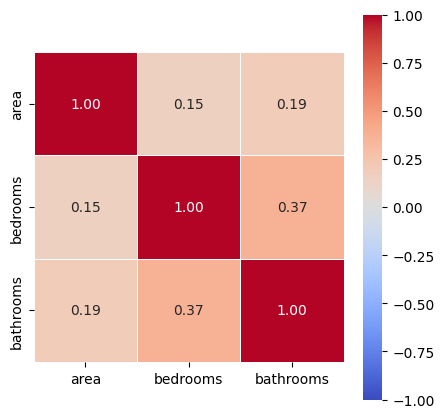

In [25]:
# Create the heatmap
mtp.figure(figsize = (5,5))
sns.heatmap(correlation_matrix, cmap = 'coolwarm',vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5)
mtp.show()

In [10]:
#Splitting the data set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
x_train.head()

,area,bedrooms,bathrooms
272,4075,3,1
40,6550,3,1
326,4100,4,1
441,4370,3,1
511,3180,3,1


In [11]:
#Fitting the Simple Linear Regression model to the training dataset
regressor= LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [12]:
#Prediction of Test and Training set result
y_pred= regressor.predict(x_test)
x_pred= regressor.predict(x_train)

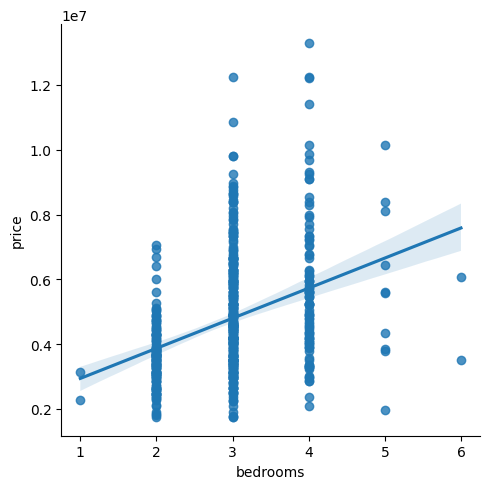

In [13]:
#data visualization
#bedroom vs price
sns.lmplot(x="bedrooms",y="price",data=d)

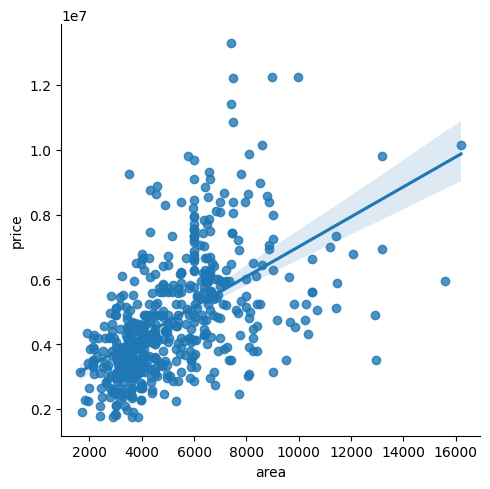

In [14]:
#Area vs price
sns.lmplot(x="area",y="price",data=d)

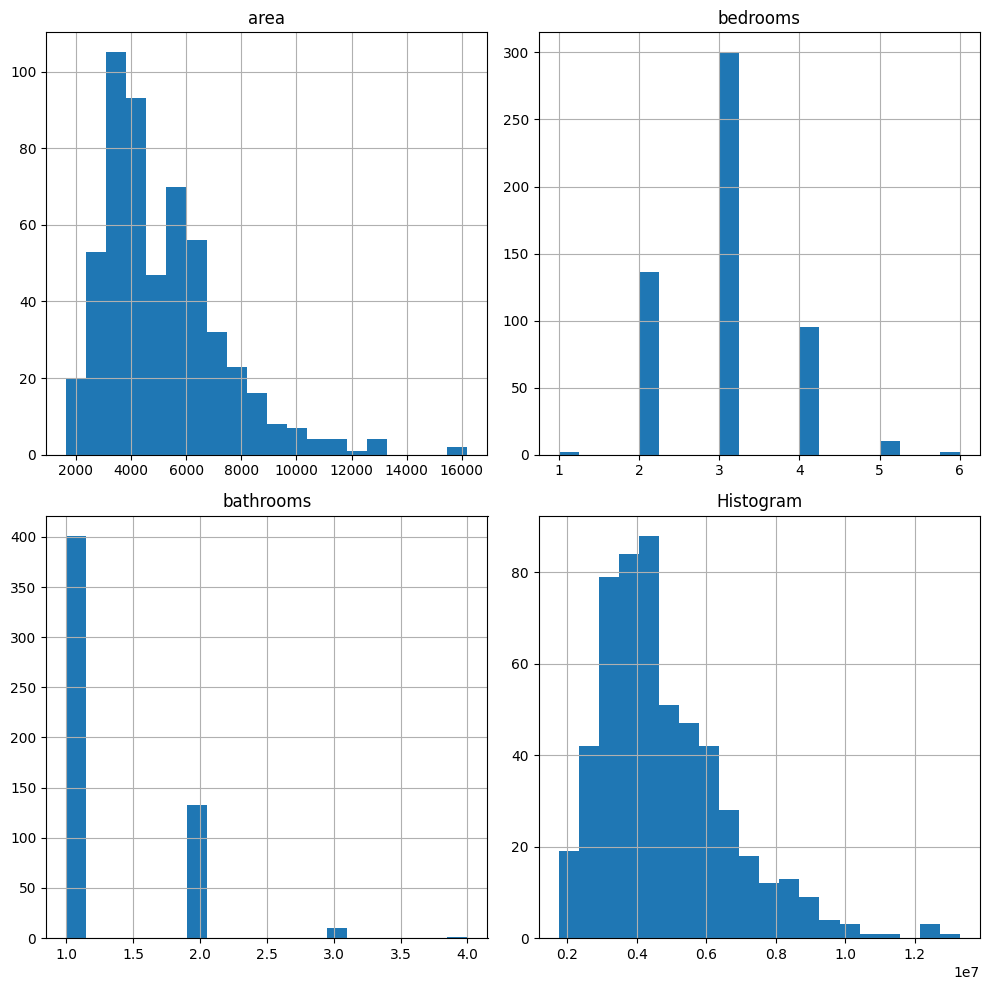

In [33]:
#data visualization
d[['area','bedrooms','bathrooms','price']].hist(bins = 20 ,figsize=(10,10))
mtp.tight_layout()
mtp.title('Histogram')
mtp.show()

In [26]:
# regression coefficients
print('Coefficients: ', regressor.coef_)
#regress intercept
print('Intercept:',regressor.intercept_)
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(regressor.score(x_test, y_test)))

Coefficients:  [[3.48787529e+02 3.63398708e+05 1.48300917e+06]]
Intercept: [-42479.25177407]
Variance score: 0.4263445080822713


In [27]:
# mean squared error
mse=mse.mean_squared_error(y_test,y_pred)
print("mean squared error",mse)

mean squared error 2408891565063.698


In [31]:
# R-squared score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)


R2 Score: 0.4263445080822713
